# Utilisation d'un array pour stocké les first digit théo. et obs. & test de différents tests statistique

In [620]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats import chisquare
from scipy.stats import ks_2samp
from scipy.stats import fisher_exact
from scipy.stats.contingency import expected_freq
from scipy.stats import chi2_contingency

## Fréquences théoriques de benford

In [621]:
freq_benford = np.zeros(9, dtype=float)
for i in range(9):
    freq_benford[i] = (math.log((1+(1/(i+1))), 10))
print(freq_benford)
sum(freq_benford)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


0.9999999999999999

### distribution théorique

In [622]:
pr_benford =  freq_benford * 1_000_000
print(pr_benford)

[301029.99566398 176091.25905568 124938.7366083   96910.01300806
  79181.24604762  66946.78963061  57991.94697769  51152.52244738
  45757.49056068]


## Distribution observé

In [623]:
pr_obs = pr_benford 
print(pr_obs)

[301029.99566398 176091.25905568 124938.7366083   96910.01300806
  79181.24604762  66946.78963061  57991.94697769  51152.52244738
  45757.49056068]


### Féquences observés

In [624]:
freq_obs = pr_obs / sum(pr_obs)
print(freq_obs)

[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]


## graphe de la fréquence observé et de la féquence de la loi Benford

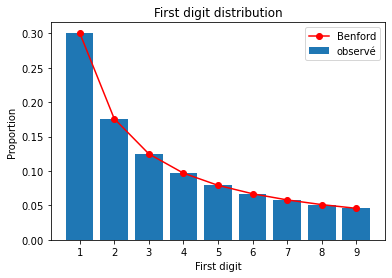

In [625]:
plt.bar(range(1,10), freq_obs)
plt.plot(range(1,10), freq_benford, marker="o",color="red")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.title("First digit distribution")
plt.xticks(range(1, 10))
plt.legend(labels = ("Benford", "observé"));

In [626]:
ks_2samp(pr_obs, pr_benford)

KstestResult(statistic=0.0, pvalue=1.0)

## test en ajoutant du bruit sur la distribution observé

In [627]:
pr_obs2 =  np.array(pr_obs)
pr_obs2 += np.random.randint(100, 201, size=9)
print(pr_obs2)
print(pr_obs)

[301216.99566398 176256.25905568 125106.7366083   97031.01300806
  79287.24604762  67083.78963061  58115.94697769  51352.52244738
  45882.49056068]
[301029.99566398 176091.25905568 124938.7366083   96910.01300806
  79181.24604762  66946.78963061  57991.94697769  51152.52244738
  45757.49056068]


In [628]:
freq_obs2 = np.array(pr_obs2 / sum(pr_obs2))
print(freq_obs2)

[0.30081601 0.17602162 0.12494019 0.09690184 0.0791817  0.06699449
 0.05803858 0.05128416 0.04582141]


### distribution théorique

In [629]:
pr_benford2 = np.array(freq_benford * sum(pr_obs2))
print(pr_benford2)

[301431.2686482  176325.988704   125105.2799442   97039.1940554
  79286.79464861  67036.02970119  58069.25024301  51220.7087598
  45818.48529559]


### graphe de la fréquence observé et de la féquence de la loi Benford

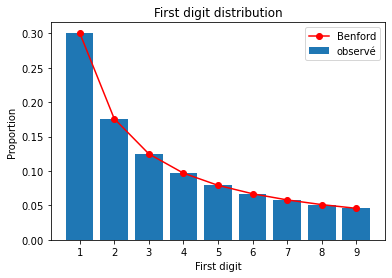

In [630]:
plt.bar(range(1,10), freq_obs2)
plt.plot(range(1,10), freq_benford, marker="o",color="red")
plt.xlabel("First digit")
plt.ylabel("Proportion")
plt.title("First digit distribution")
plt.xticks(range(1, 10))
plt.legend(labels = ("Benford", "observé"));

## Test de KS avec les distribution

In [631]:
ks_2samp(pr_obs2, pr_benford2)

KstestResult(statistic=0.1111111111111111, pvalue=1.0)

### $2^{eme}$ méthode

In [632]:
KS_obs = []
for i in range(9):
    KS_obs += [i+1]*int(pr_obs2[i])
    
KS_theo = []
for i in range(9):
    KS_theo += [i+1]*int(pr_benford2[i])
#print(KS_obs)
#print(KS_theo)
print(sum(KS_obs))
print(sum(KS_theo))

3446662
3444803


In [633]:
ks_2samp(KS_obs, KS_theo)

KstestResult(statistic=0.0002899160204573592, pvalue=0.9999999999975819)

## test du $\chi^2$  avec la fonction chi2_contingency()

In [634]:
test = np.array([list(pr_obs2), list(pr_benford2)], dtype=float)
print(test)

[[301216.99566398 176256.25905568 125106.7366083   97031.01300806
   79287.24604762  67083.78963061  58115.94697769  51352.52244738
   45882.49056068]
 [301431.2686482  176325.988704   125105.2799442   97039.1940554
   79286.79464861  67036.02970119  58069.25024301  51220.7087598
   45818.48529559]]


In [635]:
chisquare(pr_obs2, pr_benford2)

Power_divergenceResult(statistic=0.6808051416846215, pvalue=0.999573247312796)

In [636]:
chi2_contingency(test)

(0.3401696246116912,
 0.9999695542600919,
 8,
 array([[301324.13215609, 176291.12387984, 125106.00827625,
          97035.10353173,  79287.02034812,  67059.9096659 ,
          58092.59861035,  51286.61560359,  45850.48792813],
        [301324.13215609, 176291.12387984, 125106.00827625,
          97035.10353173,  79287.02034812,  67059.9096659 ,
          58092.59861035,  51286.61560359,  45850.48792813]]))

In [609]:
chisquare(test)

Power_divergenceResult(statistic=array([1.19217625e-03, 5.31787625e-05, 2.63822611e-04, 2.80589406e-04,
       2.40796370e-05, 1.27007712e-03, 6.94699757e-05, 6.36842423e-05,
       6.86614817e-04]), pvalue=array([0.97245619, 0.99418158, 0.98704084, 0.98663542, 0.99608472,
       0.9715709 , 0.99334982, 0.99363276, 0.97909516]))

## test exact de fisher

In [277]:
# fisher_exact(test) ---> pour array 2x2 !!!

#### Test de la fonction expected_freq()

In [275]:
expected_freq(test)

array([[301.02999566, 176.09125906, 124.93873661,  96.91001301,
         79.18124605,  66.94678963,  57.99194698,  51.15252245,
         45.75749056],
       [301.02999566, 176.09125906, 124.93873661,  96.91001301,
         79.18124605,  66.94678963,  57.99194698,  51.15252245,
         45.75749056]])

Ne pas pas de calcul de p-value